In [1]:
import numpy as np
from scipy.stats import invgamma, norm
from matplotlib import pyplot as plt

In [11]:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica",
  'font.size': 12,
    'figure.titlesize': 14,
    'legend.fontsize': 12
})

In [3]:
mu0=5
sigma0=4
k0=1
v0=2
wd = '/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/data'
Y = []
for i in range(1,4):
    Y.append(np.genfromtxt('{}/school{}.dat'.format(wd, i)))

In [4]:
n = np.array([len(Y[i]) for i in range(3)])
kn = np.array([k0 + n[i] for i in range(3)])
mun = np.array([(k0*mu0 + n[i]*np.mean(Y[i]))/kn[i] for i in range(3)])
vn = np.array([v0 + n[i] for i in range(3)])
sigman = np.array([(v0*sigma0 + (n[i]-1)*np.var(Y[i]) + k0*n[i]*(np.mean(Y[i])-mu0)**2/kn[i]) 
                   for i in range(3)])

### a) MC sampler

In [5]:
def MC_sample(y, kn, mun, vn, sigman, size):    
    sigma = invgamma.rvs(a=vn/2, scale=2/(vn*sigman), size=size) # ? scale ?
    theta = norm.rvs(loc=mun, scale=np.sqrt(sigman/kn), size=size)
    Ytilda = norm.rvs(loc=theta, scale=np.sqrt(sigma), size=size)
    return theta, sigma, Ytilda

### b) Apply MC sampler

In [6]:
size = 10000
sigma = np.zeros((3, size))
theta = np.zeros((3, size))
Ytilda = np.zeros((3, size))
for i in range(3):
    theta[i], sigma[i], Ytilda[i] = MC_sample(Y[i], kn=kn[i], mun=mun[i], 
                                              vn=vn[i], sigman=sigman[i], size=size)

In [7]:
print('Theta')
print('Mean', np.mean(theta, axis = 1))
print('CI95%', np.quantile(theta, q=[0.025, 0.975], axis = 1))

print('Sigma')
print('Mean', np.mean(sigma, axis = 1))
print('CI95%', np.quantile(sigma, q=[0.025, 0.975], axis = 1))

Theta
Mean [9.27558228 6.96806184 7.80810903]
CI95% [[ 1.85185187 -1.32277046  0.85340239]
 [16.61936024 15.43908171 14.816708  ]]
Sigma
Mean [1.58028419e-05 1.60045281e-05 3.30920742e-05]
CI95% [[9.10369963e-06 9.09023744e-06 1.80815764e-05]
 [2.68012870e-05 2.83441984e-05 5.98698089e-05]]


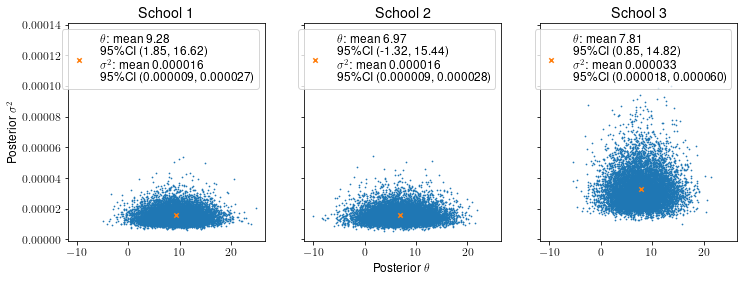

In [15]:
fig, ax = plt.subplots(1,3, figsize = (12,4), sharex = True, sharey=True)
# fig.suptitle('Density of prior distribution')

for i in range(3):
    label = '$\\theta$: mean {:.2f} \n 95\%CI ({:.2f}, {:.2f}) \n $\sigma^2$: mean {:.6f} \n 95\%CI ({:.6f}, {:.6f})'.format(
        np.mean(theta[i]), np.quantile(theta[i], q=0.025), np.quantile(theta[i], q=0.975),
        np.mean(sigma[i]), np.quantile(sigma[i], q=0.025), np.quantile(sigma[i], q=0.975))
    ax[i].scatter(theta[i], sigma[i], s = 2, marker = '.')
    ax[i].scatter(np.mean(theta[i]), np.mean(sigma[i]), s = 20, marker = 'x', label = label)
    ax[i].set_title('School {}'.format(i+1))
    ax[i].legend()

ax[1].set_xlabel('Posterior $\\theta$')
ax[0].set_ylabel('Posterior $\sigma^2$')

    
plt.savefig('/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/plots/Ex2_2_Fig1.png')

#### c) Pr(T1>T2, T1>T3) 

In [63]:
np.sum((theta[0]>theta[1]) & (theta[0]>theta[2]))/size

0.4844

#### d) Pr(Y1>Y2, Y1>Y3) 

In [64]:
np.sum((Ytilda[0]>Ytilda[1]) & (Ytilda[0]>Ytilda[2]))/size

0.4847